Accuracy: 1.00
Confusion Matrix:
[[5 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



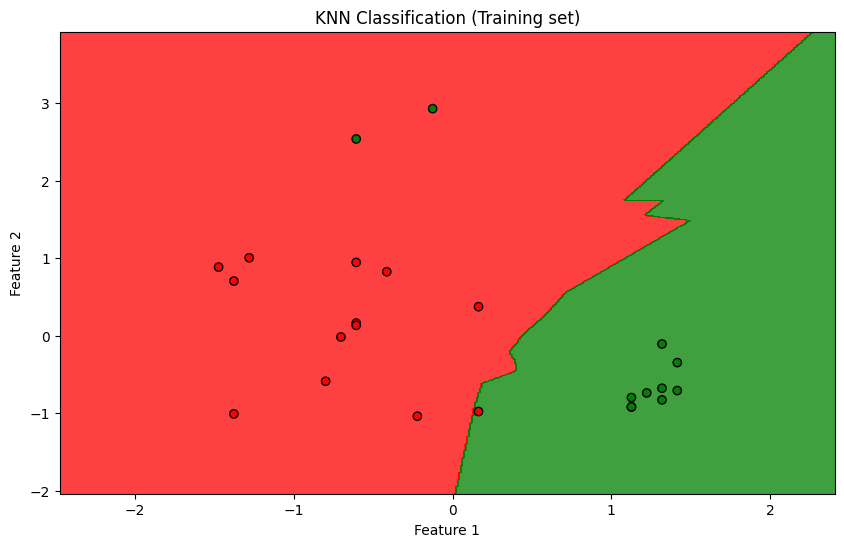

In [14]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


data_set = pd.read_excel("salary_data.xlsx")


x = data_set.iloc[:, :-1].values
y = data_set.iloc[:, -1].values


sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)


y_pred = classifier.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


if x.shape[1] == 2:
    from matplotlib.colors import ListedColormap

    x_set, y_set = x_train, y_train
    x1, x2 = np.meshgrid(
        np.arange(x_set[:, 0].min() - 1, x_set[:, 0].max() + 1, 0.01),
        np.arange(x_set[:, 1].min() - 1, x_set[:, 1].max() + 1, 0.01)
    )

    plt.figure(figsize=(10, 6))
    plt.contourf(
        x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
        alpha=0.75, cmap=ListedColormap(("red", "green"))
    )
    plt.scatter(x_set[:, 0], x_set[:, 1], c=y_set, cmap=ListedColormap(("red", "green")), edgecolors="black")
    plt.title("KNN Classification (Training set)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
